## Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score, mean_absolute_error
from pathlib import Path

In [2]:
from bayes_opt import BayesianOptimization
from bayes_opt.logger import JSONLogger
from bayes_opt.event import Events

In [3]:
%run ..//..//..//Library//SVRExtended_Library.ipynb 

## Load data

In [4]:
boston = load_boston()

# Initializing the dataframe
data = pd.DataFrame(boston.data)

#Adding the feature names to the dataframe
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
#Adding target variable to dataframe
data['PRICE'] = boston.target 

In [6]:
# Spliting target variable and independent variables
X = data.drop(['PRICE'], axis = 1)
y = data['PRICE']

In [7]:
# Matrix with feature transformation
X = pd.read_csv("..\\newBoston.csv")

In [8]:
# Splitting to training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Optimization function

In [10]:
def opt_bas(C, epsilon, lamda, gamma):
    
    # parameters
    hyperparameters = {
        'kernel' : "rbf",
        'C' : C, 
        'epsilon' : epsilon, 
        'lamda' : lamda,
        'gamma' : gamma,
    }
    
    # fit and predict
    model = SVRExtended_cvxpy(**hyperparameters).fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    # get score
#     mean_absolute_error, -r2_score
    metric = -r2_score(y_test, y_pred)
    
    return -metric

## Run optimization

In [11]:
class newJSONLogger(JSONLogger):

      def __init__(self, path):
            self._path=None
            super(JSONLogger, self).__init__()
            self._path = path if path[-5:] == ".json" else path + ".json"

In [12]:
# Bounded region of parameter space
pbounds = {'C': (2100, 2300), 'epsilon': (0.03, 1), 'lamda': (0.001, 0.4), 'gamma': (0.01, 0.07)}

# Bayes optimizer instantiation
optimizer = BayesianOptimization(f=opt_bas, 
                                 pbounds=pbounds, 
                                 random_state=10, verbose=2, 
                                )

# keep data
log_path = Path().resolve() / "Logs" / "Boston_r2_let_cvxpy_g.json"
logger = newJSONLogger(path = str(log_path))
optimizer.subscribe(Events.OPTIMIZATION_STEP, logger)

In [ ]:
optimizer.maximize(init_points = 5, n_iter=500)

### Cosa

In [ ]:
C = 464.674266
epsilon = 0.130052
gamma = 0.036080
lamda = 0.062522

In [16]:
    hyperparameters = {
        'kernel' : "rbf",
        'C' : 464.674266, 
        'epsilon' : 0.130052, 
        'lamda' : 0.036080,
        'gamma' : 0.062522,
    }
    
    # fit and predict
    model = SVRExtended_cvxpy(**hyperparameters).fit(X_train, y_train)

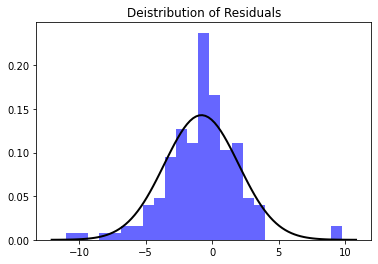

In [18]:
#%%
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results
#%%

 

df_results = calculate_residuals(model, X_test, y_test)

 

#%%
from scipy.stats import norm
import matplotlib.pyplot as plt
mu, std = norm.fit(df_results.Residuals)

 

#plot histogram
plt.hist(df_results.Residuals, bins=25, density=True, alpha=0.6, color='b')

 

#plot pdf
xmin, xmax=plt.xlim()
x=np.linspace(xmin, xmax, 100)
p = norm.pdf(x,mu,std)
plt.plot(x,p,'k',linewidth=2)
title="Deistribution of Residuals"
plt.title(title)
plt.show;